In [1]:
print("hello world")

hello world


In [5]:
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import os
print("current working Directory",os.getcwd())
current_directory = os.getcwd()
train_path = os.path.join(current_directory,"datasets","Train")
valid_path = os.path.join(current_directory,"datasets","Valid")
test_path = os.path.join(current_directory,"datasets","Test")


current working Directory c:\Users\ASUS\Documents\potato-disease-project


In [ ]:
# function is used to create an image dataset from a directory structure where images are organised into subdirectories 
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32
    image_size=(128,128),
    shuffle=True,
    # seed=None,
    #validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 900 files belonging to 3 classes.


In [ ]:
# get the class labels
labels = training_set.class_names
print(labels)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear"
)

Found 300 files belonging to 3 classes.


In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
    


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set, validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 446ms/step - accuracy: 0.3578 - loss: 1.7090 - val_accuracy: 0.4867 - val_loss: 1.0373
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 442ms/step - accuracy: 0.5365 - loss: 0.9445 - val_accuracy: 0.6500 - val_loss: 0.7472
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 488ms/step - accuracy: 0.6585 - loss: 0.6969 - val_accuracy: 0.7033 - val_loss: 0.6220
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 507ms/step - accuracy: 0.8001 - loss: 0.4935 - val_accuracy: 0.6267 - val_loss: 0.8154
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 515ms/step - accuracy: 0.8077 - loss: 0.4419 - val_accuracy: 0.8500 - val_loss: 0.3945
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 511ms/step - accuracy: 0.8666 - loss: 0.2945 - val_accuracy: 0.9067 - val_loss: 0.2441
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 516ms/step - accuracy: 0.9344 - loss: 0.1737 - val_accuracy: 0.8467 - val_loss: 0.4030
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 517ms/step - accuracy: 0.9333 - loss: 0.2296 - val_accu

In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9813 - loss: 0.0603
Training accuracy: 0.9811111092567444


In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('validation accuracy',val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.9401 - loss: 0.1552
validation accuracy 0.9433333277702332


In [ ]:
cnn.save('trained_plant_disease_model.keras')

In [ ]:
training_history.history

{'accuracy': [0.3933333456516266,
  0.5600000023841858,
  0.6844444274902344,
  0.801111102104187,
  0.851111114025116,
  0.8933333158493042,
  0.9344444274902344,
  0.9300000071525574,
  0.9411110877990723,
  0.9544444680213928],
 'loss': [1.2848111391067505,
  0.9065737128257751,
  0.6586197018623352,
  0.4722338318824768,
  0.3495621085166931,
  0.2686983644962311,
  0.16836422681808472,
  0.19507017731666565,
  0.14372865855693817,
  0.13868582248687744],
 'val_accuracy': [0.4866666793823242,
  0.6499999761581421,
  0.70333331823349,
  0.6266666650772095,
  0.8500000238418579,
  0.9066666960716248,
  0.846666693687439,
  0.9433333277702332,
  0.6600000262260437,
  0.9433333277702332],
 'val_loss': [1.0372765064239502,
  0.7471655011177063,
  0.6220179200172424,
  0.8154433369636536,
  0.3945222496986389,
  0.2441146820783615,
  0.4029715657234192,
  0.20250989496707916,
  1.3669811487197876,
  0.1729704886674881]}

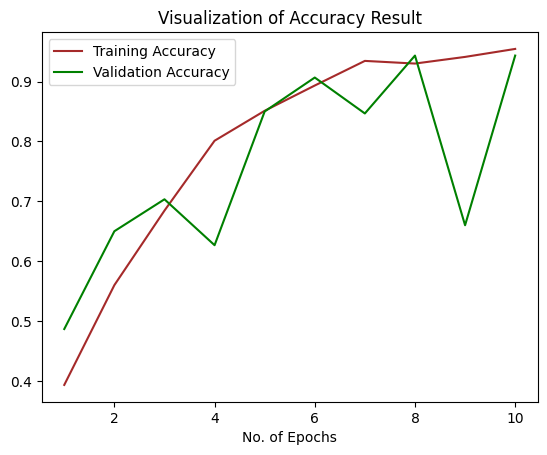

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()